# Monte carlo examples

In [1]:
# Boilerplate
%matplotlib inline
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize
import pandas as pd
import math

# Calculate pi

Npoints: 10000.000000, Nhits = 7844.0 +- 41.1


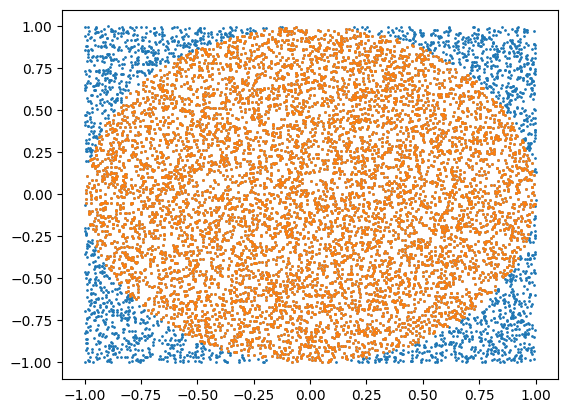

In [2]:
# Find the fraction of points that his a circle of radius r inside a square of side 2r
npoints = 10000
xpoints = np.random.uniform(-1.,1.,npoints)
ypoints = np.random.uniform(-1.,1.,npoints)
plt.scatter(xpoints,ypoints,s=1)
points = pd.DataFrame({'x':xpoints,'y':ypoints})
points['r'] = np.sqrt(points['x']**2+points['y']**2)
hits = points.query("r<=1.")
nhits = len(hits)
dnhits = np.sqrt(nhits*(1-nhits/npoints))
print('Npoints: %f, Nhits = %.1f +- %.1f'%(npoints, nhits,dnhits))
dum=plt.scatter(hits['x'],hits['y'],s=1)

In [3]:
pi = 4*nhits/npoints
dpi = 4*dnhits/npoints
dev = (pi-math.pi)/dpi
print("Calculated value of pi: %.4f +- %.4f (%.3f sigma)"%(pi,dpi,dev))

Calculated value of pi: 3.1376 +- 0.0164 (-0.243 sigma)


# Throw a spherically symmetrical distribution

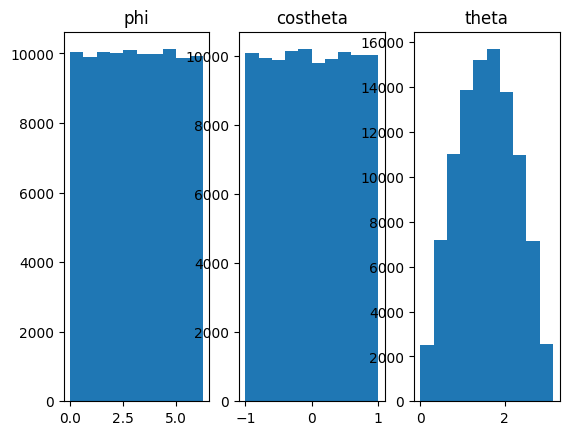

In [4]:
npoints = 100000
costheta = np.random.uniform(-1.,1.,npoints)
phi = np.random.uniform(0,2*math.pi,npoints)
points = pd.DataFrame({'costheta':costheta,'phi':phi})
points['theta'] = np.arccos(points['costheta'])
fig = plt.figure()
fig.add_subplot(131)
dum = plt.hist(points['phi'])
dum = plt.title('phi')
fig.add_subplot(132)
dum = plt.hist(points['costheta'])
dum = plt.title('costheta')
fig.add_subplot(133)
dum = plt.hist(points['theta'])
dum = plt.title('theta')

In [5]:
# Now let's see how many hit a 50 cm target 5m away
L = 5.
points['tantheta']=np.tan(points['theta'])
points['rho'] = L*points['tantheta']
# Drop the backwards going tracks!
hits = points.query("costheta>0.")
hits = hits.query("rho<.5")
nhits = len(hits)
dnhits = math.sqrt(nhits*(1-nhits/npoints))
expected = npoints*(.5)**2/L**2/4
print("Nhits: %d +- %.1f, expected: %.1f (%.2f sigma)"%
      (nhits,dnhits,expected,(nhits-expected)/dnhits))

Nhits: 249 +- 15.8, expected: 250.0 (-0.06 sigma)


# Arbitrary distributions

In [6]:
# Returns N 1-D random numbesr based on the function myfunc, in the range xlo to xhi
# funcmax is the maximum value of funcmax
#
def mydist(func,N=1,xlo=0.,xhi=1.,funcmax=1.):
    s = np.empty(N)         # Generate an empty vector N long
    for i in range(0,N):   
        while (True):       # Loop until we find a "good" number
            x = np.random.uniform(xlo,xhi)
            if(func(x)>=funcmax*np.random.uniform()):
                break       # Exit the generation loop
        s[i]=x
    return s

In [7]:
# Theta distribution (range 0 to pi, max 1)
def thetadist(x):
    return(np.exp(-x))

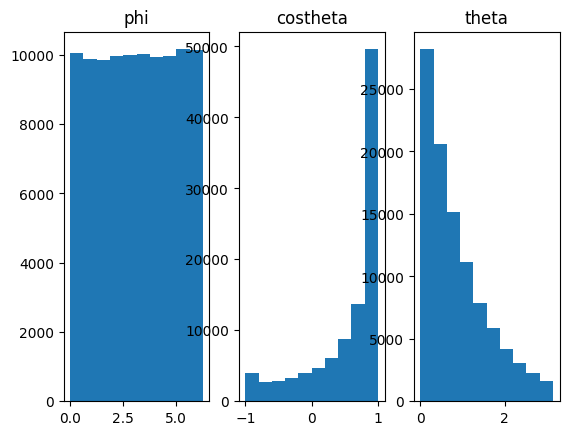

In [8]:
theta = mydist(thetadist,npoints,0.,math.pi,1)
phi = np.random.uniform(0,2*math.pi,npoints)
points = pd.DataFrame({'theta':theta,'phi':phi})
points['costheta'] = np.cos(points['theta'])
fig = plt.figure()
fig.add_subplot(131)
dum = plt.hist(points['phi'])
dum = plt.title('phi')
fig.add_subplot(132)
dum = plt.hist(points['costheta'])
dum = plt.title('costheta')
fig.add_subplot(133)
dum = plt.hist(points['theta'])
dum = plt.title('theta')

In [9]:
# Now let's see how many hit a 50 cm target 5m away
L = 5.
points['tantheta']=np.tan(points['theta'])
points['rho'] = L*points['tantheta']
# Drop the backwards going tracks!
hits = points.query("costheta>0.")
hits = hits.query("rho<.5")
newnhits = len(hits)
newdnhits = math.sqrt(nhits*(1-nhits/npoints))
print("Nhits: %d +- %.1f, compared to %d +- %.1f before"%
      (newnhits,newdnhits,nhits,dnhits))

Nhits: 9981 +- 15.8, compared to 249 +- 15.8 before
